Summary statistics by corpus:
  corpus_name  doc_text_length_mean  doc_text_length_median  \
0        CDLK            1219.38000                  1193.5   
1        KLP1             847.25239                   859.0   

   doc_text_length_std  doc_text_length_min  doc_text_length_max  \
0           274.091804                  391                 2151   
1           297.096572                   18                 2240   

   token_count_mean  token_count_median  token_count_std  token_count_min  \
0       2076.810000              2040.0       452.284213              662   
1       1665.066922              1688.0       560.203577               38   

   token_count_max  sentence_count_mean  sentence_count_median  \
0             3640           138.810000                  140.0   
1             4088           149.701721                  150.0   

   sentence_count_std  sentence_count_min  sentence_count_max  num_files_count  
0           31.667936                  64                 234  

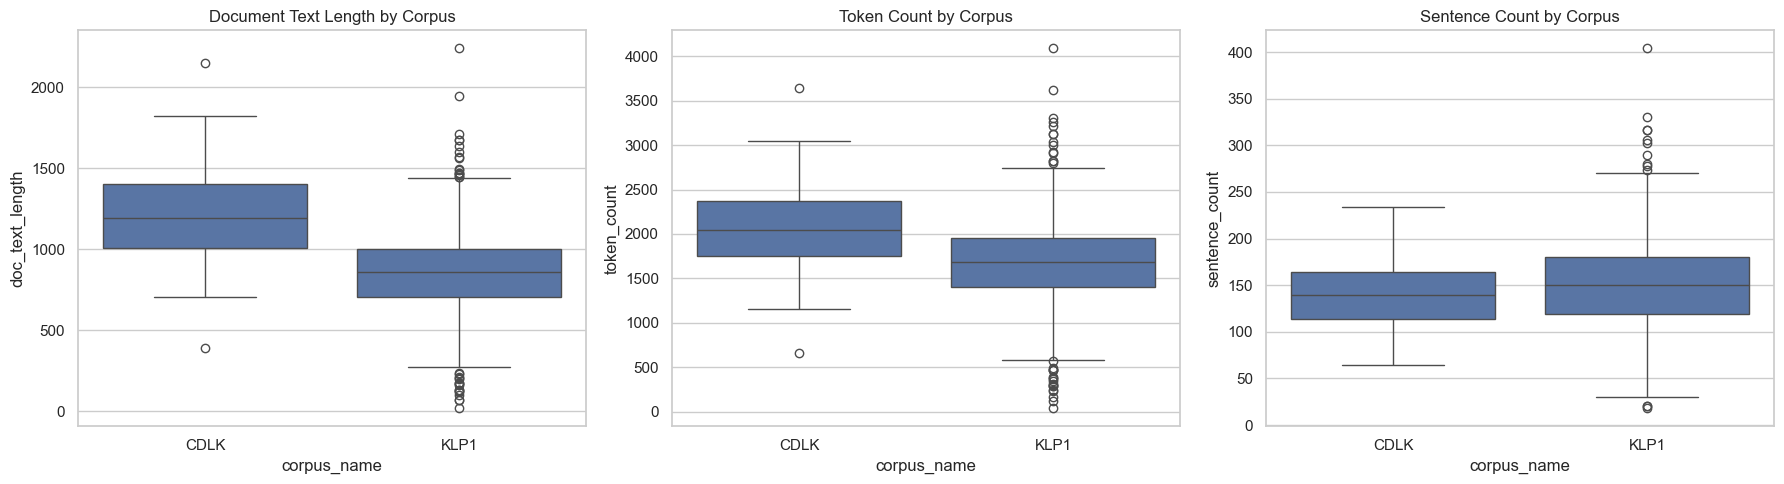

In [1]:
# corpus_comparison.py (or corpus_comparison.ipynb)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Paths to your preprocessed CSV files ---
CDLK_CSV = "xmi_basic_info_cdlk.csv"
KLP1_CSV = "xmi_basic_info_klp1.csv"

# --- Load both corpora as pandas DataFrames ---
df_cdlk = pd.read_csv(CDLK_CSV)
df_klp1 = pd.read_csv(KLP1_CSV)

# --- Add a corpus label to identify the source ---
df_cdlk["corpus_name"] = "CDLK"
df_klp1["corpus_name"] = "KLP1"

# --- Combine both DataFrames ---
df_combined = pd.concat([df_cdlk, df_klp1], ignore_index=True)

# --- Calculate summary statistics for key columns ---
summary_stats = df_combined.groupby("corpus_name").agg({
    "doc_text_length": ["mean", "median", "std", "min", "max"],
    "token_count": ["mean", "median", "std", "min", "max"],
    "sentence_count": ["mean", "median", "std", "min", "max"],
    "filename": "count"  # number of files
}).rename(columns={"filename": "num_files"})

# Flatten multi-level columns for readability
summary_stats.columns = ["_".join(col) for col in summary_stats.columns]
summary_stats = summary_stats.reset_index()

print("Summary statistics by corpus:")
print(summary_stats)

# --- Plot side-by-side comparisons ---

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Document length comparison
sns.boxplot(data=df_combined, x="corpus_name", y="doc_text_length", ax=axes[0])
axes[0].set_title("Document Text Length by Corpus")

# Token count comparison
sns.boxplot(data=df_combined, x="corpus_name", y="token_count", ax=axes[1])
axes[1].set_title("Token Count by Corpus")

# Sentence count comparison
sns.boxplot(data=df_combined, x="corpus_name", y="sentence_count", ax=axes[2])
axes[2].set_title("Sentence Count by Corpus")

plt.tight_layout()
plt.show()
